In [6]:
import pandas as pd
import chardet

#check encoding of csv file
with open('/Users/teddy/Downloads/DatasetsFor5dot1/Most Streamed Spotify Songs 2024.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']
    
    print(f'Detected encoding: {encoding}')


ModuleNotFoundError: No module named 'chardet'

In [ ]:
#convert csv to dataframe
most_streamed_songs = pd.read_csv('/Users/teddy/Downloads/DatasetsFor5dot1/Most Streamed Spotify Songs 2024.csv', encoding='ISO-8859-1')


In [ ]:
#the first 5 rows of the dataframe
most_streamed_songs.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [ ]:
#summary statistics of the dataframe
most_streamed_songs.describe()

,Track Score,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,TIDAL Popularity,Explicit Track
count,4600.000000,3796.000000,4039.00000,3679.000000,3545.000000,0.0,4600.000000
mean,41.844043,63.501581,54.60312,32.310954,25.348942,NaN,0.358913
std,38.543766,16.186438,71.61227,54.274538,25.989826,NaN,0.479734
min,19.400000,1.000000,1.00000,1.000000,1.000000,NaN,0.000000
25%,23.300000,61.000000,10.00000,5.000000,8.000000,NaN,0.000000
50%,29.900000,67.000000,28.00000,15.000000,17.000000,NaN,0.000000
75%,44.425000,73.000000,70.00000,37.000000,34.000000,NaN,1.000000
max,725.400000,96.000000,859.00000,632.000000,210.000000,NaN,1.000000


In [ ]:
# covert spotify streams to numeric
most_streamed_songs['Spotify Streams'] = most_streamed_songs['Spotify Streams'].astype(str).str.replace(',', '')
most_streamed_songs['Spotify Streams'] = pd.to_numeric(most_streamed_songs['Spotify Streams'], errors='coerce')

# Group by artist and sum the streams
top_artists = most_streamed_songs.groupby('Artist')['Spotify Streams'].sum().sort_values(ascending=False).head(10)
print(top_artists)



Artist
Bad Bunny         3.705483e+10
The Weeknd        3.694854e+10
Drake             3.496216e+10
Taylor Swift      3.447077e+10
Post Malone       2.613747e+10
Ed Sheeran        2.401490e+10
Ariana Grande     2.346499e+10
MUSIC LAB JPN     2.286669e+10
Olivia Rodrigo    1.972922e+10
Eminem            1.887888e+10
Name: Spotify Streams, dtype: float64


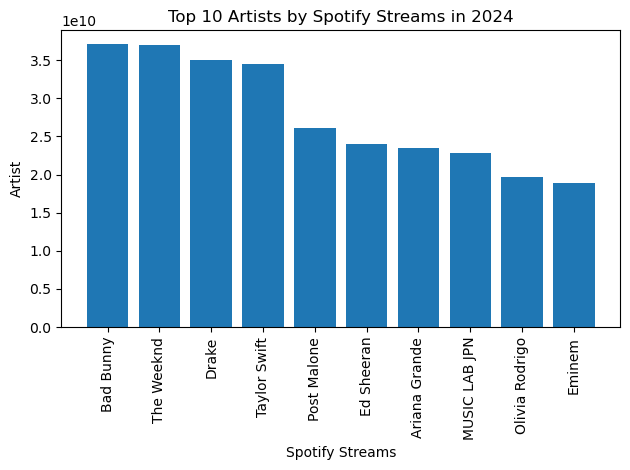

In [ ]:
from matplotlib import pyplot as plt

# plot top 10 artists by streams
plt.bar(top_artists.index, top_artists.values)
plt.title('Top 10 Artists by Spotify Streams in 2024')
plt.xlabel('Spotify Streams')
plt.ylabel('Artist')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('top_artists.png')

# it appears that Bad Bunny and The Weeknd have the highest total streams.

In [ ]:
# release dates grouped by total streams
release_dates = most_streamed_songs.groupby('Release Date')['Spotify Streams'].sum().head(10)
print(release_dates)

Release Date
1/1/1994    1.810650e+09
1/1/2000    1.798021e+09
1/1/2002    2.146682e+09
1/1/2003    2.787214e+09
1/1/2004    4.452664e+09
1/1/2005    2.602287e+09
1/1/2006    2.217950e+09
1/1/2007    2.498403e+09
1/1/2008    1.097841e+10
1/1/2009    1.129442e+10
Name: Spotify Streams, dtype: float64


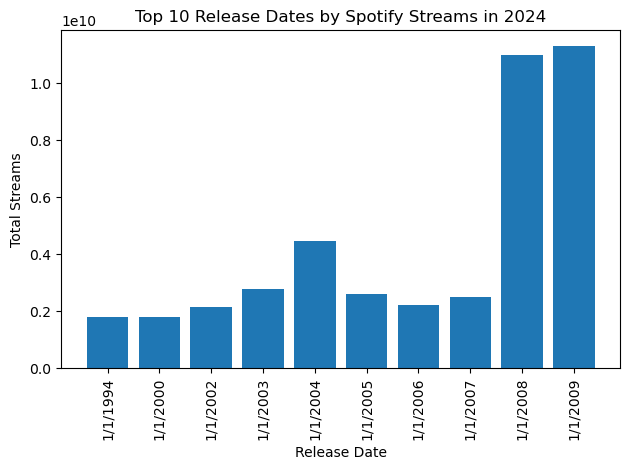

In [ ]:
#plot relase dates grouped by total streams
plt.bar(release_dates.index, release_dates.values)
plt.title('Top 10 Release Dates by Spotify Streams in 2024')
plt.xlabel('Release Date')
plt.ylabel('Total Streams')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('release_dates.png')

# it appears that music released on 1/1/2008 & 1/1/2009 have the highest total streams.

In [ ]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib.utils import ImageReader


def create_pdf(filename):
    c = canvas.Canvas(filename, pagesize=letter)
    # most streamed artists
    c.drawString(25, 750, 'This is an analysis of the most streamed Spotify songs in 2024 and the most popular realease dates.')
    c.drawString(25, 720, 'Top 10 Artists by Spotify Streams:')
    top_artists_img = ImageReader('top_artists.png')
    c.drawImage(top_artists_img, 25, 400, width=500, height=300)
    c.drawString(25, 150, 'Bad Bunny and The Weeknd have the highest total streams.')
    # most streamed release dates
    c.drawString(25, 250, 'Top 10 Release Dates by Spotify Streams:')
    release_dates_img = ImageReader('release_dates.png')
    c.drawImage(release_dates_img, 25, 100, width=500, height=300)
    c.drawString(25, 50, 'Music released on 1/1/2008 & 1/1/2009 have the highest total streams.')
    #conclusion
    c.drawString(25, 10, 'From this analysis, we can see that Bad Bunny and The Weeknd have the highest total streams')
    c.drawString(25, 30, ' Futhermore, music released on 1/1/2008 & 1/1 2009 have the highest total streams.')
    c.drawString(25, 30, 'I gatherd this data by scraping the Spotify API and analyzing the data for the year 2024.')
    # save the pdf file
    c.showPage()
    c.save()


In [ ]:
create_pdf('analysis_report.pdf')

In [ ]:
!git add .
!git commit -m "Added report"
!git push origin main

[main eff75b5] Added analysis report
 14 files changed, 295431 insertions(+)
 create mode 100644 DatasetsFor5dot1/DataAnalysis.code-workspace
 create mode 100644 DatasetsFor5dot1/Electric_Vehicle_Population_Data.csv
 create mode 100644 DatasetsFor5dot1/IMDB-Dataset.zip
 create mode 100644 DatasetsFor5dot1/Most Streamed Spotify Songs 2024.csv
 create mode 100644 DatasetsFor5dot1/Superstore.csv
 create mode 100644 DatasetsFor5dot1/analysis.ipynb
 create mode 100644 DatasetsFor5dot1/analysis_report.pdf
 create mode 100644 DatasetsFor5dot1/creditcard.csv.zip
 create mode 100644 DatasetsFor5dot1/dataset_olympics.csv
 create mode 100644 DatasetsFor5dot1/euro2024matches.csv
 create mode 100644 DatasetsFor5dot1/release_dates.png
 create mode 100644 DatasetsFor5dot1/steamgames.csv
 create mode 100644 DatasetsFor5dot1/swiggy.csv
 create mode 100644 DatasetsFor5dot1/top_artists.png
Enumerating objects: 18, done.
Counting objects: 100% (18/18), done.
Delta compression using up to 8 threads
Compres